# Text and Sentiment Analysis

It seems that the two main topics are opinions about the feature and the benefits it is providing to the users.

In [3]:
import pandas as pd, json, os, sys, re, numpy as np, matplotlib.pyplot as plt, pprint, nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter

In [2]:
with open('dic_topic_doc.json', 'r') as f:
    dic_topic_doc = json.load(f)

In [3]:
dic_topic_doc

{'video-0ZF35dPoBeE.txt': [[1, 0.9989647269248962]],
 'redditPost26.txt': [[0, 0.02096175029873848],
  [1, 0.960452675819397],
  [2, 0.018585531041026115]],
 'redditPost27.txt': [[0, 0.0126342186704278],
  [1, 0.8323156237602234],
  [2, 0.1550501137971878]],
 'redditPost33.txt': [[1, 0.986385703086853]],
 'NPRArticle.txt': [[0, 0.6721392869949341],
  [1, 0.1981590986251831],
  [2, 0.12970158457756042]],
 'redditPost25.txt': [[1, 0.9907061457633972]],
 'redditPost31.txt': [[1, 0.9903482794761658]],
 'redditPost19.txt': [[0, 0.011108404956758022], [1, 0.9872679114341736]],
 'redditPost30.txt': [[0, 0.9742536544799805],
  [1, 0.013712401501834393],
  [2, 0.012033951468765736]],
 'redditPost24.txt': [[1, 0.9996384978294373]],
 'redditPost20.txt': [[1, 0.9824207425117493]],
 'redditPost34.txt': [[0, 0.013135211542248726],
  [1, 0.973135232925415],
  [2, 0.013729606755077839]],
 'redditPost35.txt': [[1, 0.9997169375419617]],
 'redditPost21.txt': [[1, 0.4846574068069458], [2, 0.51383626461029

## Keyword Extraction

In [4]:
from gensim.models import LdaModel

lda_model = LdaModel.load('misc/lda/lda_model.gensim')

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.010*"dj" + 0.009*"one" + 0.007*"ai" + 0.005*"like" + 0.005*"music" + 0.005*"song" + 0.004*"said" + 0.004*"say" + 0.004*"spotify" + 0.004*"two"
Topic 1: 0.027*"song" + 0.019*"like" + 0.016*"dj" + 0.012*"playlist" + 0.011*"ai" + 0.010*"spotify" + 0.010*"play" + 0.010*"music" + 0.007*"time" + 0.007*"im"
Topic 2: 0.025*"music" + 0.023*"playlist" + 0.021*"like" + 0.020*"song" + 0.018*"spotify" + 0.015*"artist" + 0.015*"new" + 0.010*"listen" + 0.009*"find" + 0.008*"also"


Let's do a little bit more keyword extraction with TF-IDF.

In [49]:
topic1Content = ""
topic2Content = ""

for doc, probs in dic_topic_doc.items():
    topicNum = list(filter(lambda x: max([x[1] for x in probs]) == x[1], probs))[0][0]
    if topicNum == 1:
        with open('data/{}'.format(doc), 'r') as f:
            topic1Content += f.read() + "\n\n"
    elif topicNum == 2:
        with open('data/{}'.format(doc), 'r') as f:
            topic2Content += f.read() + "\n\n"

print("Topic 1 Content Length:", len(topic1Content))
print("Topic 2 Content Length:", len(topic2Content))

Topic 1 Content Length: 275642
Topic 2 Content Length: 141175


In [ ]:
# def clean_text(text):
#     # Remove URLs, special chars
#     text = re.sub(r'http\S+|@\w+|#\w+|[^\w\s]', '', text)  
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     words = [word for word in text.split() if word.lower() not in stop_words]
#     return ' '.join(words)

# topic1Content = clean_text(topic1Content)
# topic2Content = clean_text(topic2Content)
# print("Topic 1 Content Length:", len(topic1Content))
# print("Topic 2 Content Length:", len(topic2Content))

# stop = set(stopwords.words('english'))
# exclude = set(string.punctuation)
# lemma = WordNetLemmatizer()

# def clean(doc: str):
#     punc_free = ''.join([ch for ch in doc.lower() if ch not in exclude])
#     stop_free = ' '.join([i for i in punc_free.split() if i not in stop])
#     normalised = ' '.join(lemma.lemmatize(word) for word in stop_free.split())
#     # stemmed = ' '.join([stemmer.stem(word) for word in normalised.split()])
#     return normalised

# topic1Content = clean(topic1Content)
# topic2Content = clean(topic2Content)
# print("Topic 1 Content Length:", len(topic1Content))
# print("Topic 2 Content Length:", len(topic2Content))

Topic 1 Content Length: 171774
Topic 2 Content Length: 93517


In [ ]:
# from rake_nltk import Rake
# r = Rake()

# r.extract_keywords_from_text(topic1Content)
# print("Topic 1 Keywords:", r.get_ranked_phrases()[:10])

Topic 1 Keywords: ['premium video id okannc0dko ive using feature couple day actually love dj switch thing every 4 song kinda wish heard intro song would make feel like radio dj id love also able request mood genre would amazing love discovering new music dj us already liked music id prefer bring europe yeah need dolby atmos lossless true karaoke mode 😤 finally say video killed radio star killed cd star killed download star killed streaming star killed radio star bro need germany would glad supported every country love spotify dj please bring pc application web app soon possible typically use phone offline really love concept great alternative service like spotify dont want listen radio one thing id love see though ability give x assignment like look x genre style playlist similar google oh also true shuffle mode obviously cause seems still problem edit also seem unable use im netherlands despite entire phone english region lock bitch cant wait launch europe 🙌 please bring country love

In [50]:
import re
import spacy
from rake_nltk import Rake

nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # Remove URLs, emojis, non-alphanumeric chars
    text = re.sub(r'http\S+|@\w+|#\w+|[^\w\s]', '', text)
    doc = nlp(text)
    # Keep nouns/adjectives only
    words = [token.lemma_ for token in doc if token.pos_ in ('NOUN', 'ADJ', 'VERB')]
    return ' '.join(words)

topic1Content = clean_text(topic1Content)
topic2Content = clean_text(topic2Content)

In [ ]:
r = Rake(min_length=1, max_length=10)
r.extract_keywords_from_text(topic1Content)
print("Topic 1 Keywords:")
pprint.pprint(r.get_ranked_phrases()[:10])  # Top 10 cleaned keywords

print()

print("Topic 2 Keywords:")
r = Rake(min_length=1, max_length=10)
r.extract_keywords_from_text(topic2Content)
pprint.pprint(r.get_ranked_phrases()[:10])  # Top 10 cleaned keywords

Topic 1 Keywords:
['use let party moor take moor dig shallow grave lie',
 'song twice minute flyleaf song play go dreadful recco gripe',
 'intro people listen less mainstream music front fresh beginningand beta',
 'match average speed radio host irl make authentic sound cool',
 'wrong break mobile select playlist program builder let choose playlist',
 'mood different think old school country heavy metal classical grunge',
 'voice like nepotism immortalize voice synthesizer company money weird like',
 'plexamp hate crossfade fiery passion artist want hear want hear',
 'listen mean estimate thing accurate want ability choose voicepersona dj',
 'play music background party dinner hate second silence track music']

Topic 2 Keywords:
['adult inclination particular audioaesthetic experience corporate people '
 'music industry level',
 'reproach scroll spotify reccomende song much music taste shape engage',
 'part want please tap button change genre get amiable get',
 'available say ai improv

Let's run some NER tagging on the web articles to see key mentions.

In [56]:
nlp = spacy.load("en_core_web_sm")

In [57]:
guardianText = ""
mixmagText = ""
nprText = ""
techradarText = ""

with open("articles/GuardianArticle.json", "r") as f:
    guardianText = json.load(f)["content"]
with open("articles/Mixmag.json", "r") as f:
    mixmagText = json.load(f)["content"]
with open("articles/NPRArticle.json", "r") as f:
    nprText = json.load(f)["content"]
with open("articles/TechRadar.json", "r") as f:
    techradarText = json.load(f)["content"]

In [ ]:
from spacy import displacy

In [65]:
doc = nlp(guardianText)
pprint.pprint([(X.text, X.label_) for X in doc.ents])

labels = [x.label_ for x in doc.ents]
print(Counter(labels))

displacy.render(doc, style='dep', jupyter=True, options={'distance': 70})
displacy.render(doc, style='ent', jupyter=True, options={'ents': ['ORG', 'GPE', 'PERSON', 'DATE', 'WORK_OF_ART']})

[('Radioheads Creep', 'PERSON'),
 ('DJ', 'ORG'),
 ('30 this year', 'DATE'),
 ('Spotifys', 'ORG'),
 ('Discover Weekly', 'ORG'),
 ('end-of-year', 'DATE'),
 ('AI', 'GPE'),
 ('Ill', 'GPE'),
 ('AI', 'ORG'),
 ('Spotify', 'ORG'),
 ('this year', 'DATE'),
 ('OpenAI', 'ORG'),
 ('AI', 'GPE'),
 ('Marquee Moon', 'PERSON'),
 ('The Slits Typical Girls', 'WORK_OF_ART'),
 ('Jimmy Eat Worlds', 'PERSON'),
 ('one', 'CARDINAL'),
 ('Xavier X Jernigan', 'PERSON'),
 ('Spotifys', 'ORG'),
 ('The Get Up', 'WORK_OF_ART'),
 ('daily', 'DATE'),
 ('morning', 'TIME'),
 ('Spotify', 'ORG'),
 ('Jernigans', 'NORP'),
 ('first', 'ORDINAL'),
 ('every day', 'DATE'),
 ('itisa little', 'ORG'),
 ('2018', 'DATE'),
 ('three', 'CARDINAL'),
 ('summer', 'DATE'),
 ('past years', 'DATE'),
 ('R&B', 'ORG'),
 ('Apple Musics', 'ORG'),
 ('Ebro Darden', 'GPE'),
 ('Zane Lowe', 'PERSON'),
 ('Elton John', 'PERSON'),
 ('AI', 'GPE'),
 ('30 minutes', 'TIME'),
 ('thousands', 'CARDINAL')]
Counter({'ORG': 11, 'DATE': 8, 'PERSON': 6, 'GPE': 5, 'CARDIN

In [66]:
doc = nlp(mixmagText)
pprint.pprint([(X.text, X.label_) for X in doc.ents])

labels = [x.label_ for x in doc.ents]
print(Counter(labels))

displacy.render(doc, style='dep', jupyter=True, options={'distance': 70})
displacy.render(doc, style='ent', jupyter=True, options={'ents': ['ORG', 'GPE', 'PERSON', 'DATE', 'WORK_OF_ART']})

[('AI', 'GPE'),
 ('Spotify', 'ORG'),
 ('AI', 'ORG'),
 ('DL', 'ORG'),
 ('Spotify', 'GPE'),
 ('AI', 'ORG'),
 ('Spotify', 'ORG'),
 ('Spotify', 'GPE'),
 ('daily', 'DATE'),
 ('AI', 'GPE'),
 ('Spotifys', 'ORG'),
 ('Discover Weekly', 'ORG'),
 ('Wrapped', 'PERSON'),
 ('yearly', 'DATE'),
 ('AI', 'ORG'),
 ('Spotifys', 'ORG'),
 ('OpenAI tech', 'ORG'),
 ('Spotifys', 'ORG'),
 ('AI', 'GPE'),
 ('AI', 'GPE'),
 ('Sonastic', 'ORG'),
 ('Spotify', 'GPE'),
 ('last year', 'DATE'),
 ('Spotifys', 'ORG'),
 ('Xavier Jernigan', 'PERSON'),
 ('X. Currently', 'PERSON'),
 ('Asia', 'LOC'),
 ('U.S.', 'GPE'),
 ('Canada', 'GPE'),
 ('Spotify Premium', 'ORG')]
Counter({'ORG': 14, 'GPE': 9, 'DATE': 3, 'PERSON': 3, 'LOC': 1})


In [67]:
doc = nlp(nprText)
pprint.pprint([(X.text, X.label_) for X in doc.ents])

labels = [x.label_ for x in doc.ents]
print(Counter(labels))

displacy.render(doc, style='dep', jupyter=True, options={'distance': 70})
displacy.render(doc, style='ent', jupyter=True, options={'ents': ['ORG', 'GPE', 'PERSON', 'DATE', 'WORK_OF_ART']})

[('Chloe Veltman Spotify AI', 'PERSON'),
 ('Kelefa Sanneh', 'PERSON'),
 ('Seven', 'CARDINAL'),
 ('Sanneh', 'PERSON'),
 ('Spotify', 'GPE'),
 ('itsAI DJfeature', 'ORG'),
 ('nearly two years ago', 'DATE'),
 ('Spotify', 'ORG'),
 ('Spotify', 'ORG'),
 ('millions', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('AI', 'GPE'),
 ('Sultan', 'GPE'),
 ('Spotify', 'ORG'),
 ('Sultan', 'PERSON'),
 ('DJ', 'ORG'),
 ('English', 'LANGUAGE'),
 ('AI', 'GPE'),
 ('Spanish', 'LANGUAGE'),
 ('Spotify', 'ORG'),
 ('Xavier Jernigan', 'PERSON'),
 ('English', 'LANGUAGE'),
 ('AI', 'GPE'),
 ('DJ', 'ORG'),
 ('Sultan', 'PERSON'),
 ('Xavier Jernigan', 'PERSON'),
 ('Spotify', 'ORG'),
 ('X.  Spotify', 'ORG'),
 ('Jernigan', 'PERSON'),
 ('Joe Inzerillo', 'PERSON'),
 ('Spotify', 'ORG'),
 ('Pandora', 'PERSON'),
 ('Pandora', 'GPE'),
 ("The New Yorker's", 'ORG'),
 ('Sanneh', 'PERSON'),
 ('Shakira', 'PERSON'),
 ("Celine Dion's", 'PERSON'),
 ('River Deep Mountain High', 'WORK_OF_ART'),
 ('Celine', 'ORG'),
 ('Celine Dion', 'PERSON'),
 ('the S

In [68]:
doc = nlp(techradarText)
pprint.pprint([(X.text, X.label_) for X in doc.ents])

labels = [x.label_ for x in doc.ents]
print(Counter(labels))

displacy.render(doc, style='dep', jupyter=True, options={'distance': 70})
displacy.render(doc, style='ent', jupyter=True, options={'ents': ['ORG', 'GPE', 'PERSON', 'DATE', 'WORK_OF_ART']})

[('the Red Sea', 'LOC'),
 ('2023', 'DATE'),
 ('One', 'CARDINAL'),
 ('daily', 'DATE'),
 ('Spotify', 'ORG'),
 ('the past two years', 'DATE'),
 ('this year', 'DATE'),
 ('DJs', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('DJs', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('90s', 'DATE'),
 ('Radiohead', 'ORG'),
 ('Surprises', 'PRODUCT'),
 ('first', 'ORDINAL'),
 ('Verve', 'GPE'),
 ('Mazzy Star', 'PERSON'),
 ('second', 'ORDINAL'),
 ('the 70s and', 'DATE'),
 ('80s', 'DATE'),
 ('Spotifys Release Radar', 'ORG'),
 ('New Music', 'ORG'),
 ('Friday', 'DATE'),
 ('Ill', 'PERSON'),
 ('AI', 'GPE'),
 ('Spotify', 'GPE'),
 ('One', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('20', 'CARDINAL'),
 ('three', 'CARDINAL'),
 ('Daylist', 'PERSON'),
 ('AI', 'GPE'),
 ('Spotify', 'GPE')]
Counter({'DATE': 8, 'CARDINAL': 6, 'ORDINAL': 5, 'GPE': 5, 'ORG': 4, 'PERSON': 3, 'LOC': 1, 'PRODUCT': 1})


The following keywords can be identified:

Topic 1: like, playlist, dreadful, cool, radio, choose, voice, dj, ai

Topic 2: music, playlist, artist, new, find, profile, obscure, rotate, album, majority

## Sentiment and Mention Analysis

What are the sentiments and emotions of people? How does number of mentions correlate with sentiment?

### Data Preparation

First, I'll need to prepare some data that I can feed into the sentiment analysis. I need to prepare a collection of all sentences/statements mentioned across reddit posts, comments, YouTube comments and articles so that I can carry out sentiment scoring.

In [4]:
import ast

In [18]:
# Prepare a set of texts for sentiment analysis
texts = []

In [6]:
redditData = pd.read_csv("reddit_spotify_ai_dj.csv")
redditData.comments = redditData.comments.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
redditData.head()

,title,score,url,num_comments,created_utc,selftext,comments
0,The AI DJ is so bad it's actually good,192,https://www.reddit.com/r/spotify/comments/1fuo...,72,1.727896e+09,The AI DJ Spotify introduced can get repetitiv...,"[“Yo, let me play somethin’ you never heard be..."
1,"I don’t want to make fun of the AI DJ, is it j...",2,https://www.reddit.com/r/spotify/comments/1l6q...,14,1.749425e+09,"Mine said Michael Jackson was soul, and it pla...",[Just today my dj went Spanish for a monologue...
2,Is Spotify’s AI DJ X actually good now?,13,https://www.reddit.com/r/spotify/comments/1isp...,11,1.739919e+09,I’ve noticed a bunch of my friends are listeni...,"[I didn't like it at first, but I definitely f..."
3,The new AI DJ in Spotify is genuinely awesome....,384,https://www.reddit.com/r/spotify/comments/1831...,285,1.700859e+09,Just in case anyone is not aware I'm not talki...,[I really liked it at first but after using it...
4,"Spotify Debuts a New AI DJ, Right in Your Pocket",261,https://newsroom.spotify.com/2023-02-22/spotif...,139,1.677086e+09,NaN,[Key points:\n\n* Spotify has launched a new A...


In [7]:
from nltk.tokenize import sent_tokenize

In [19]:
for index, row in redditData.iterrows():
    sentences = [row['title']]
    if not pd.isnull(row['selftext']):
        sentences.extend(sent_tokenize(row['selftext']))
    
    sentences.extend(sent_tokenize(' '.join(row['comments']).replace('\n', ' ')))
    texts.extend(x.strip() for x in sentences if 'http' not in x.lower() and 'www' not in x and len(x.strip()) > 2)

In [21]:
print("Total sentences after Reddit:", len(texts))

Total sentences after Reddit: 7339


In [10]:
commentsFiles = [f for f in os.listdir('ytVideoComments') if f.endswith('.csv')]

In [22]:
for videoFile in commentsFiles:
    fileCommentsData = pd.read_csv('ytVideoComments/{}'.format(videoFile))
    sentences = []
    for comment in fileCommentsData.text:
        if isinstance(comment, str) and len(comment.strip()) > 2 and 'http' not in comment.lower() and 'www' not in comment.lower():
            sentences.extend(sent_tokenize(comment))
    print("Adding {} sentences from {}".format(len(sentences), videoFile))
    texts.extend(sentences)

Adding 203 sentences from ok-aNnc0Dko.csv
Adding 129 sentences from 0ZF35dPoBeE.csv
Adding 44 sentences from grUJ97ajA4Y.csv
Adding 41 sentences from iFAWLhcBNaA.csv
Adding 32 sentences from ozF85QOz6Dg.csv


In [23]:
print("Total sentences after YouTube comments:", len(texts))

Total sentences after YouTube comments: 7788


In [24]:
articleFiles = [f for f in os.listdir('articles') if f.endswith('.json')]

In [27]:
for articleFile in articleFiles:
    with open('articles/{}'.format(articleFile), 'r') as f:
        articleData = json.load(f)
    
    sentences = []
    if 'title' in articleData and isinstance(articleData['title'], str) and len(articleData['title'].strip()) > 2:
        sentences.extend(sent_tokenize(articleData['title'].strip()))
    
    if 'content' in articleData and isinstance(articleData['content'], str) and len(articleData['content'].strip()) > 2:
        sentences.extend(sent_tokenize(articleData['content'].strip()))
    
    texts.extend(x.strip() for x in sentences if 'http' not in x.lower() and 'www' not in x and len(x.strip()) > 2)

In [28]:
print("Total sentences after articles:", len(texts))

Total sentences after articles: 7902


### Sentiment Polarity Scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
analyser.lexicon.update({"😂": 4, "af": 2})  # Adjust weights as needed

scores = []
for text in texts:
    scores.append(analyser.polarity_scores(text))
scores

[{'neg': 0.312, 'neu': 0.486, 'pos': 0.202, 'compound': -0.38},
 {'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'compound': -0.714},
 {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.5719},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.183, 'neu': 0.681, 'pos': 0.136, 'compound': -0.3489},
 {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.4019},
 {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.8402},
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.25},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.228, 'neu': 0.526, 'pos': 0.246, 'compound': 0.0516},
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027},
 {'neg': 0.221, 'neu': 0.535, 'pos': 0.245, 'compound': 0.3418},
 {'neg': 0.129, 'neu': 0.655, 'pos': 0.216, 'compound': 0.6124},
 {'neg': 0.09, 'neu': 0.91, 'pos': 0.0, 'compound': -0.1232

In [51]:
df = pd.DataFrame(columns=['text', 'pos', 'neu', 'neg', 'compound', 'sentiment_label'])
for i, score in enumerate(scores):
    sentimentLabel = None
    highestScoreIndex = np.argmax([score['pos'], score['neu'], score['neg']])
    if highestScoreIndex == 0:
        sentimentLabel = 'pos'
    elif highestScoreIndex == 1:
        sentimentLabel = 'neu'
    elif highestScoreIndex == 2:
        sentimentLabel = 'neg'
    else:
        sentimentLabel = 'unknown'
    
    df.loc[i] = [texts[i], score['pos'], score['neu'], score['neg'], score['compound'], sentimentLabel]  # Adding a row

In [52]:
df.head()

,text,pos,neu,neg,compound,sentiment_label
0,The AI DJ is so bad it's actually good,0.202,0.486,0.312,-0.3800,neu
1,The AI DJ Spotify introduced can get repetitiv...,0.000,0.729,0.271,-0.7140,neu
2,True Shuffle.,0.737,0.263,0.000,0.4215,pos
3,"Since 2016, I've wanted a feature that Deezer ...",0.083,0.917,0.000,0.4215,neu
4,"Spotify never had this, just categorizes daily...",0.227,0.773,0.000,0.5719,neu


In [55]:
df.sentiment_label.value_counts()

sentiment_label
neu    7417
pos     324
neg     161
Name: count, dtype: int64

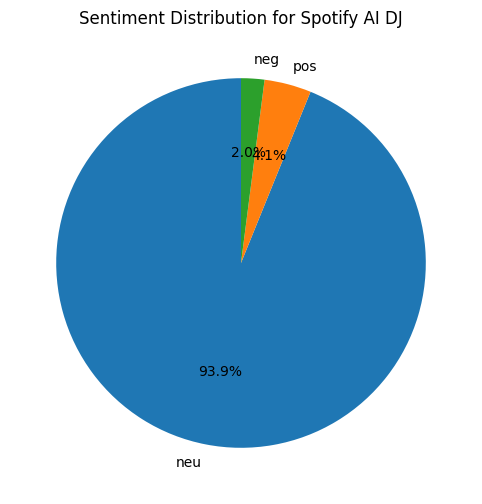

In [56]:
# Visualise the sentiment scores as pie chart
sentiment_counts = df.sentiment_label.value_counts()

plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution for Spotify AI DJ')
plt.show()

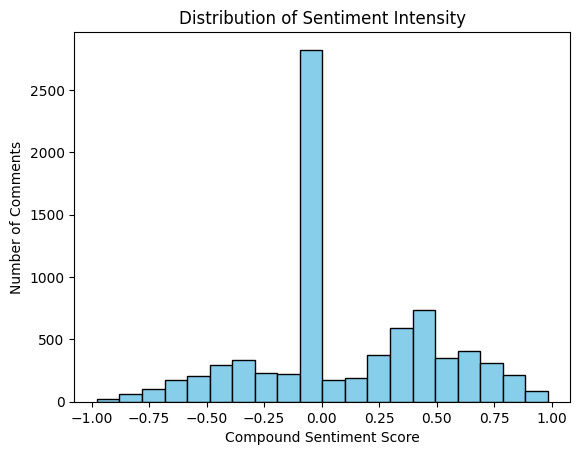

In [57]:
plt.hist(df['compound'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Intensity')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()

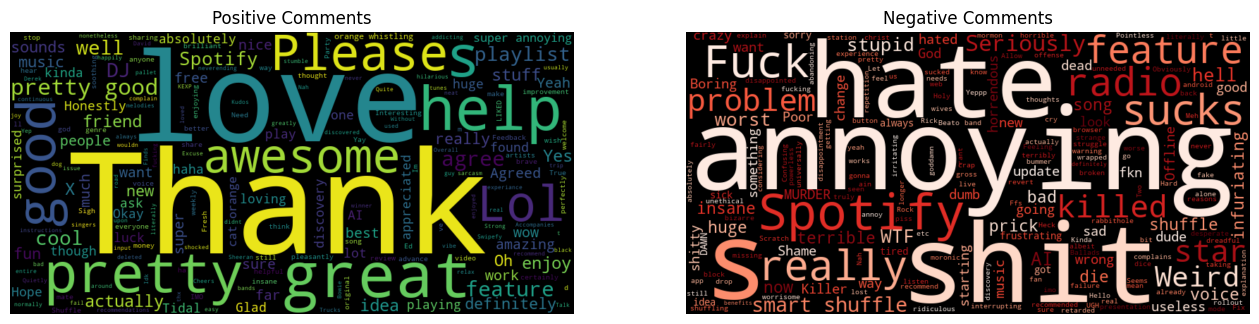

In [61]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['sentiment_label']=='pos']['text'])
negative_text = " ".join(df[df['sentiment_label']=='neg']['text'])

pos_cloud = WordCloud(width=800, height=400).generate(positive_text)
neg_cloud = WordCloud(width=800, height=400, colormap='Reds').generate(negative_text)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(pos_cloud, interpolation='bilinear')
axes[0].set_title('Positive Comments')
axes[0].axis('off')

axes[1].imshow(neg_cloud, interpolation='bilinear')
axes[1].set_title('Negative Comments')
axes[1].axis('off')

plt.show()